In [1]:
# Insert all required imports here
import pandas as pd
import numpy as np

In [2]:
#import data here
yearend = pd.read_csv('yearend.csv')
tr= pd.read_csv('tr.csv', engine='python')
releases= pd.read_csv('releases.csv')
admissions = pd.read_csv('admissions.csv', engine='python')

In [3]:
#inmates that were over 55 when at the year's end
yearend = yearend[yearend['AGEYREND']==5]
yearend = yearend[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGEYREND','TIMESRVD_YREND']]

In [4]:
#inmates who were admitted after they were 55
admissions = admissions[admissions['AGEADMIT']==5]
admissions = admissions[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT']]


In [5]:
tr = tr[(tr['AGERELEASE']==5) | (tr['AGERELEASE']==' ')]

In [6]:
tr = tr.reset_index()

In [7]:
def is_over_55(row):
    '''
    A function that determines whether an inmate is over 55 when they are released or, if
    they have not been released, determines whether they are currently over 55.
    
    input: a row of a dataframe. Can be passed to apply as a lambda function
    returns: boolean
    '''
    if (row['AGERELEASE']==' ') & (2014-row['ADMITYR']+(int(str(row['AGEADMIT']).ljust(2,'5'))+10)>55):
        return True
    else:
        return False

over55 = tr.apply(lambda row: is_over_55(row), axis=1)

In [9]:
tr['OVER55'] = over55

In [10]:
#inmates that were released when they were over 55 or inmates that have not yet been released and could be over 55
tr=tr[(tr['AGERELEASE']==5) | (tr['OVER55']==True)]
tr= tr[['ABT_INMATE_ID', 'SEX', 'ADMTYPE', 'OFFGENERAL', 'EDUCATION', 'ADMITYR','RELEASEYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGERELEASE', 'TIMESRVD','RELTYPE', 'STATE']]

In [12]:
#inmates that were released when they were over 55
releases=releases[releases['AGERLSE']==5]
releases = releases[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'RELYR', 'RELTYPE','AGERLSE', 'TIMESRVD_REL']]

In [13]:
releases.columns

Index(['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL',
       'ADMITYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'RELYR',
       'RELTYPE', 'AGERLSE', 'TIMESRVD_REL'],
      dtype='object')

In [14]:
tr.columns

Index(['ABT_INMATE_ID', 'SEX', 'ADMTYPE', 'OFFGENERAL', 'EDUCATION', 'ADMITYR',
       'RELEASEYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGERELEASE',
       'TIMESRVD', 'RELTYPE', 'STATE'],
      dtype='object')

In [15]:
admissions.columns

Index(['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL',
       'ADMITYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT'],
      dtype='object')

In [16]:
yearend.columns

Index(['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL',
       'ADMITYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGEYREND',
       'TIMESRVD_YREND'],
      dtype='object')

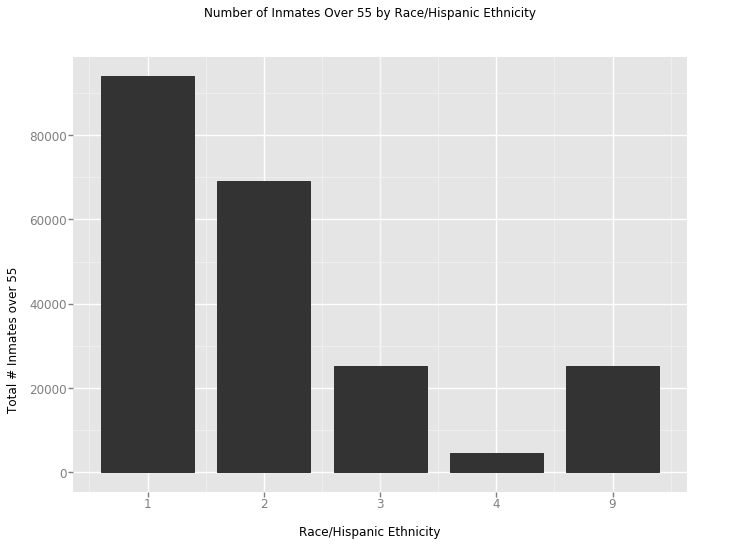

<ggplot: (-9223372036566832461)>

In [22]:
ggplot(aes('RACE'), data=tr) +\
geom_bar() +\
labs(x = "Race/Hispanic Ethnicity", y="Total # Inmates over 55", title = "Number of Inmates Over 55 by Race/Hispanic Ethnicity")

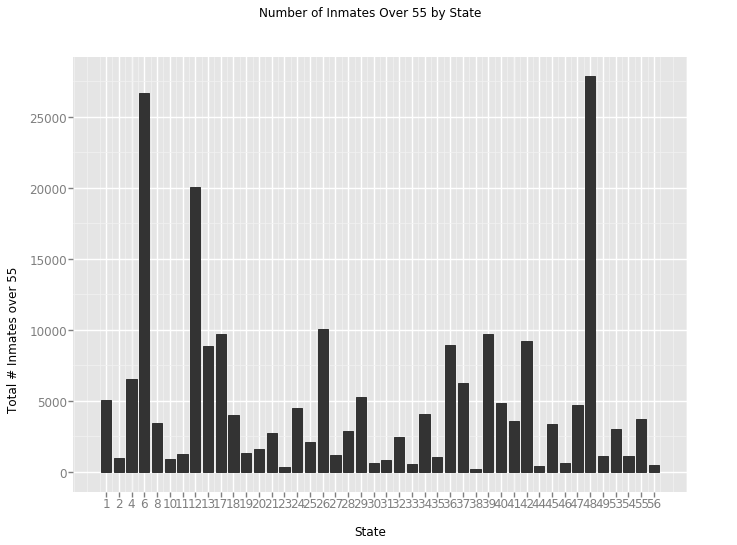

<ggplot: (289504334)>

In [20]:
from ggplot import *

ggplot(aes('STATE'), data=tr) +\
geom_bar() +\
labs(x = "State", y="Total # Inmates over 55", title = "Number of Inmates Over 55 by State")